<a href="https://colab.research.google.com/github/rajkbs/Machine-Learning/blob/master/Boston_Housing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Boston Housing Prediction**

1. Linear Regression
2. XBGRegressor

Loading of Library files


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split 
from sklearn import metrics

Importing the Boston House Dataset

In [2]:
house_price_data = sklearn.datasets.load_boston()

In [3]:
print(house_price_data)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
# Creating data frame

house_df = pd.DataFrame(house_price_data.data, columns = house_price_data.feature_names)

In [5]:
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
house_df['PRICE'] = house_price_data.target

In [7]:
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Checking Number of Rows and Columns

In [8]:
house_df.shape

(506, 14)

Checking for Missing Values

In [9]:
house_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

Finding Correlation between features

In [10]:
house_df_cor = house_df.corr()

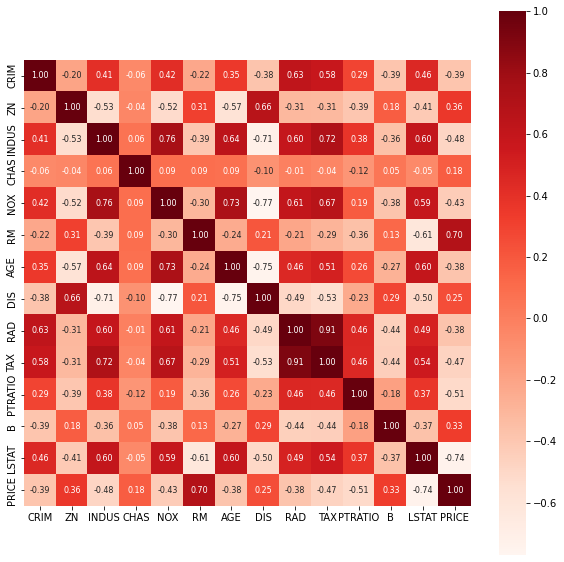

In [11]:
# Preparing the heatmap

plt.figure(figsize=(10, 10))
sns.heatmap(house_df_cor, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Reds')


In [12]:
house_df_drp = house_df.drop(['RAD'], axis=1)

In [13]:
house_df_drp.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


In [14]:
X = house_df_drp.drop(['PRICE'], axis=1)
Y = house_df_drp['PRICE']

print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX  ...     DIS    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  4.0900  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  4.9671  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  4.9671  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  6.0622  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  6.0622  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...     ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  2.4786  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  2.2875  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  2.1675  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  2.3889  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  2.5050  273.0     21.0  396.90   7.88

[50

Splitting Dataset into Train and Test

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

Model Creation
      
      Linear Regression
      XBGRegressor

In [17]:
model_linear = LinearRegression()

In [18]:
model_xbgregressor = XGBRegressor()

Fit the model    Linear Regression

In [19]:
# Linear Regression 
model_linear.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Fit the model XBGRegressor

In [20]:
# XGBRegressor 
model_xbgregressor.fit(X_train, Y_train)

[15:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

**Model Evaluation**

Prediction on training data

In [21]:
train_data_pre_linear = model_linear.predict(X_train)
train_data_pre_xgbr = model_xbgregressor.predict(X_train)

In [22]:
print(train_data_pre_linear)

[24.95892452 23.00582006 19.84268957 30.97993672 13.98648431 12.01026002
 19.27743369 16.11357346 14.2975967  22.89807171 15.23572535 11.67016417
 33.4000575  24.26514523 31.54839519 18.13931462 23.2851165  25.21399583
 31.66525033 20.83424203 34.11442145  3.86773635 40.30610244 23.54419362
 19.5578362  23.59531756 23.60285576 24.88139085 22.11785301 32.97651974
 26.67497126  8.12863421 18.10154883  9.85535051 19.52924765 12.65305313
 17.51592817 25.73369143 14.81159643 17.1414148  24.96754954 27.65640317
 16.6057448  24.56239836 14.36404444 11.97999966 27.22918418 19.04031895
 44.60658712 17.63845105 21.17484748 33.03064168 22.13641627 22.76433145
 22.10832784 20.89983874 26.38221974 32.65082742 23.62118304 32.14196311
 21.78719058 40.6906891  16.5041942   9.7998122  25.97980702 13.78442571
 27.5442863  18.31415347 25.60680493 37.8409896  34.5854649  34.13893293
 24.1591078  29.03771812 24.76514553 43.66304651 18.53919542 22.75103351
 18.82627148 28.06072006 32.99493405 25.99091411 27

In [23]:
print(train_data_pre_xgbr)

[23.459051  22.500284  21.189697  33.58715   15.35392   13.580703
 21.957432  15.42741   11.891983  21.815624  16.241648   7.7644887
 31.207037  48.74179   32.614674  20.792767  21.950304  20.684738
 31.768343  20.491478  25.787714   8.481612  45.083153  21.930395
 20.368475  20.086699  19.638725  26.195494  23.01299   31.954813
 21.486446   9.244804  18.920538  21.604528  12.423259  10.289693
 13.139927  23.674013  18.863703  15.928226  23.785234  28.254242
 15.485361  18.239752  16.361376  14.110584  25.350868  17.612627
 49.800785  17.156652  21.788952  32.858604  16.103704  22.594355
 21.071926  19.710718  22.111246  38.364944  30.543423  32.71839
 20.97701   47.64729   14.491605   8.035881  20.131233   8.824936
 26.816822  17.943996  20.275393  46.464638  39.863705  34.15189
 22.452507  34.556095  24.758394  49.944267  14.53296   20.503386
 20.2222    23.052465  49.487606  23.404123  24.74246   20.469007
 43.44735   17.078554  32.1025    34.73112    7.252245  20.22755
 18.47909   

Evaluation for Linear Regression

In [24]:
#  R square (coefficient of determination) regression score function.
# sklearn.metrics.r2_score
# sklearn.metrics.mean_absolute_error
# sklearn.metrics.mean_squared_error

score_linear_1 = metrics.r2_score(Y_train, train_data_pre_linear)
score_linear_2 = metrics.mean_absolute_error(Y_train, train_data_pre_linear)

print("R squared error for Linear Regression : ", score_linear_1)
print("Mean Absolute Error Linear Regression : ", score_linear_2)

R squared error for Linear Regression :  0.7149187097459346
Mean Absolute Error Linear Regression :  3.4005526763793137


Evaluation for XGBRegression

In [25]:
#  R square (coefficient of determination) regression score function.
# sklearn.metrics.r2_score
# sklearn.metrics.mean_absolute_error
# sklearn.metrics.mean_squared_error

score_xgbr_1 = metrics.r2_score(Y_train, train_data_pre_xgbr)
score_xgbr_2 = metrics.mean_absolute_error(Y_train, train_data_pre_xgbr)

print("R squared error for XGBRegression : ", score_xgbr_1)
print("Mean Absolute Error XGBRegression : ", score_xgbr_2)

R squared error for XGBRegression :  0.9723821370499433
Mean Absolute Error XGBRegression :  1.1665079898173265


Visualisation of Train dataset for Linear Regression

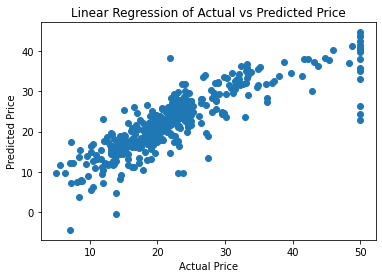

In [27]:
plt.scatter(Y_train, train_data_pre_linear)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Linear Regression of Actual vs Predicted Price")
plt.show()

Visualisation of Train dataset for XGBRegressor

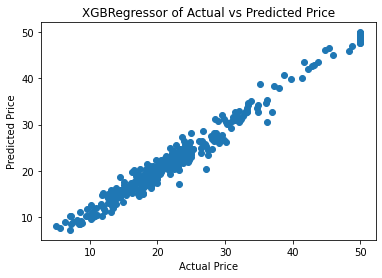

In [29]:
plt.scatter(Y_train, train_data_pre_xgbr)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("XGBRegressor of Actual vs Predicted Price")
plt.show()